In [1]:
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 
plt.style.use('ggplot')

In [2]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_csv('CDNOW_master.txt',names=columns,sep='\s+')
# sep 表示任意空白符

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df['order_date'] = pd.to_datetime(df.order_dt,format="%Y%m%d")
df['month']= df.order_date.values.astype('datetime64[M]')
#pd.to_datetime可以将特定的字符串或者数字转换成时间格式，
#其中的format参数用于匹配。例如19970101，%Y匹配前四位数字1997，
#如果y小写只匹配两位数字97，%m匹配01，%d匹配01。
#另外，小时是%h，分钟是%M，注意和月的大小写不一致，秒是%s。
#若是1997-01-01这形式，则是%Y-%m-%d，以此类推。

In [7]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [8]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [9]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


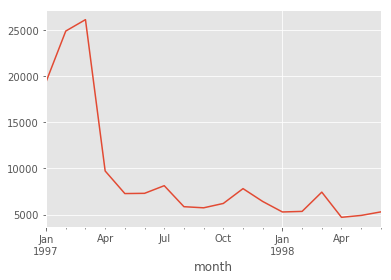

In [10]:
df.groupby('month').order_products.sum().plot()

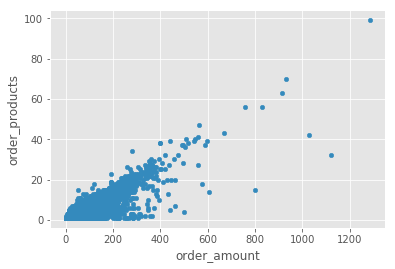

In [11]:
df.plot.scatter(x ='order_amount',y ='order_products')

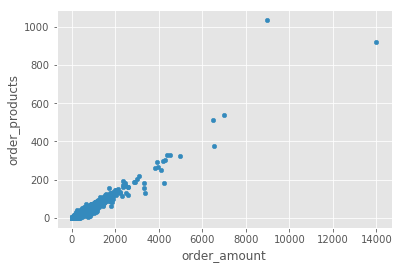

In [12]:
df.groupby('user_id').sum().plot.scatter(x='order_amount',y='order_products')

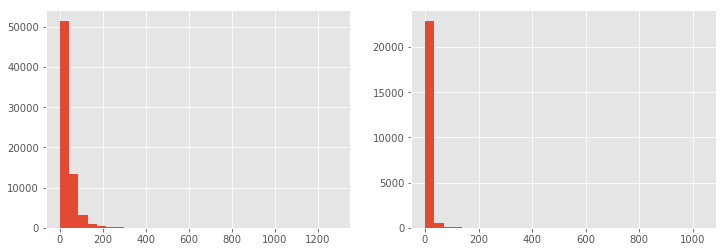

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.order_amount.hist(bins=30)

plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins=30)

In [14]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [15]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [16]:
pivoted_counts=df.pivot_table(index='user_id',columns ='month',
                              values='order_dt',aggfunc='count').fillna(0)
columns_month =df.month.sort_values().astype('str').unique()#df.month.排序。str格式。取唯一值
pivoted_counts.columns=columns_month

pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
pivoted_counts_transf =pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x ==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


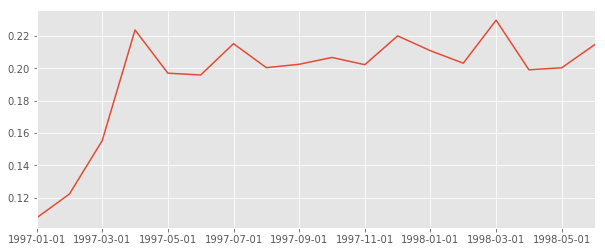

In [18]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(10,4))

用sum和count相除即可计算出复购率。因为这两个函数都会忽略NaN，而NaN是没有消费的用户，count不论0还是1都会统计，所以是总的消费用户数，而sum求和计算了两次以上的消费用户。这里用了比较巧妙的替代法计算复购率，SQL中也可以用。

In [19]:
pivoted_amount = df.pivot_table(index = 'user_id',columns='month',
                                  values = 'order_amount',aggfunc='mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns =columns_month

In [20]:
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [21]:
pivoted_purchase =pivoted_amount.applymap(lambda x:1 if x>1 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [22]:
def purchase_return(data):
    status=[]
    for i in range(17):
        if data[i] ==1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status
pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.head()


,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


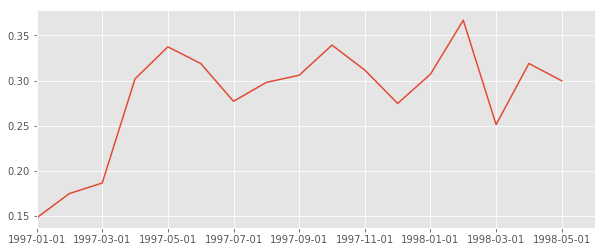

In [23]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,4))

最后的计算和复购率大同小异，用count和sum求出。从图中可以看出，用户的回购率高于复购，约在30%左右，波动性也较强。新用户的回购率在15%左右，和老客差异不大。

将回购率和复购率综合分析，可以得出，新客的整体质量低于老客，老客的忠诚度（回购率）表现较好，消费频次稍次，这是CDNow网站的用户消费特征。

In [24]:
def active_status(data):
    status =[]
    for i in range(18):
        #若本月没有消费
        if data[i] ==0:
            if len(status) >0:
                if status[i-1] =='unreg':
                    status.append('unreg')
                else :
                    status.append('unactive')
            else :
                status.append('unreg')
        
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1] =='unactive':
                    status.append('return')
                elif status[i-1] =='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status.head()
                    

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [25]:
purchase_status_counts=pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


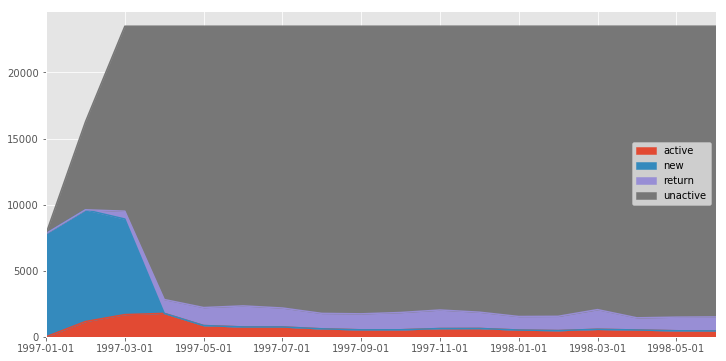

In [26]:
purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))

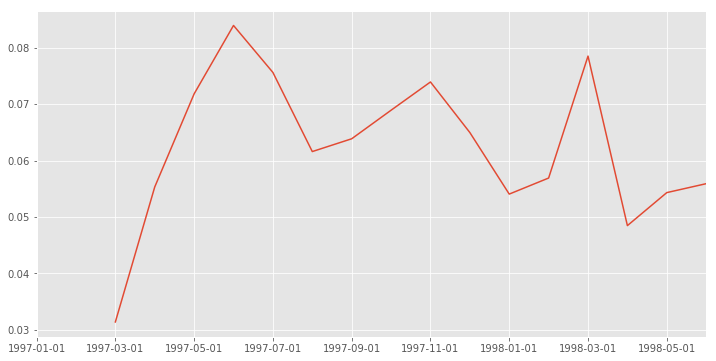

In [27]:
ever_rata= purchase_status_counts.apply(lambda x:x/x.sum(),axis=1)
ever_rata.loc['return'].plot(figsize=(12,6))

用户回流占比在5%～8%，有下降趋势。所谓回流占比，就是回流用户在总用户中的占比。另外一种指标叫回流率，指上个月多少不活跃/消费用户在本月活跃/消费。因为不活跃的用户总量近似不变，所以这里的回流率也近似回流占比。

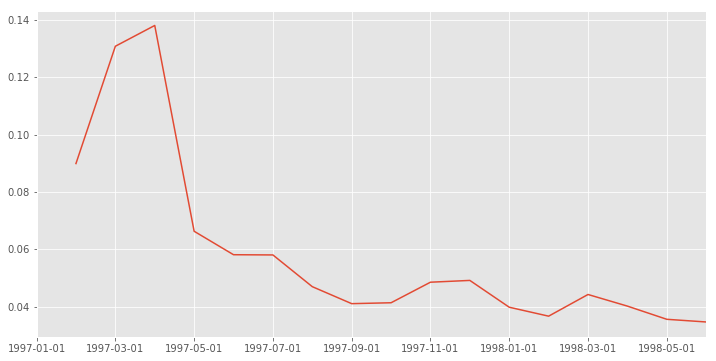

In [28]:
ever_rata.loc['active'].plot(figsize=(12,6))

In [29]:
user_amount=df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [30]:
amounts_total =user_amount.amount_cumsum.max()
user_amount['prop']=user_amount.apply(lambda x:x.amount_cumsum/amounts_total,axis=1)
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


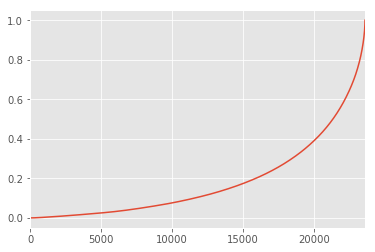

In [31]:
user_amount.prop.plot()

统计一下销量，前两万个用户贡献了45%的销量，高消费用户贡献了55%的销量。

In [32]:
user_purchase = df[['user_id','order_products','order_amount','order_date']]
order_data_min = user_purchase.groupby('user_id').order_date.min()
order_data_max = user_purchase.groupby('user_id').order_date.max()

In [33]:
(order_data_max-order_data_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

统计出用户第一次消费和最后一次消费的时间，相减，得出每一位用户的生命周期。因为数据中的用户都是前三个月第一次消费，所以这里的生命周期代表的是1月～3月用户的生命周期。因为用户会持续消费，所以理论上，随着后续的消费，用户的平均生命周期会增长。

In [34]:
(order_data_max-order_data_min).mean()

Timedelta('134 days 20:55:36.987696')

求一下平均，所有用户的平均生命周期是134天，比预想的高

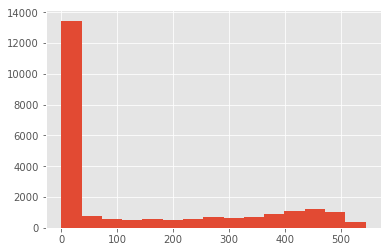

In [35]:
((order_data_max-order_data_min)/np.timedelta64(1,'D')).hist(bins=15)

因为这里的数据类型是timedelta时间，它无法直接作出直方图，所以先换算成数值。换算的方式直接除timedelta函数即可，这里的np.timedelta64(1, 'D')，D表示天，1表示1天，作为单位使用的。因为max-min已经表示为天了，两者相除就是周期的天数。

In [36]:
life_time = (order_data_max-order_data_min).reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


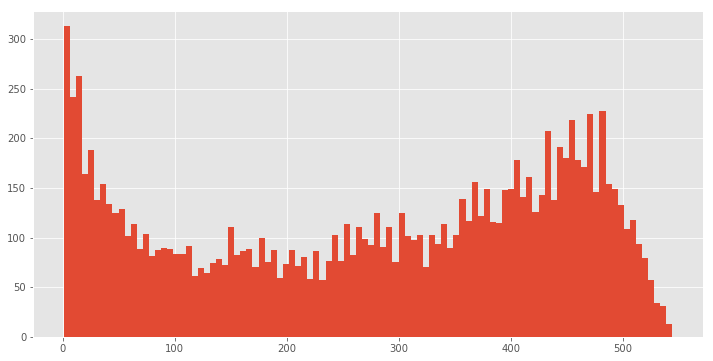

In [37]:
life_time['life_time'] = life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time >0].life_time.hist(bins=100,figsize=(12,6))

这个图比上面的靠谱多了，虽然仍旧有不少用户生命周期靠拢在0天。这是双峰趋势图。部分质量差的用户，虽然消费了两次，但是仍旧无法持续，在用户首次消费30天内应该尽量引导。少部分用户集中在50天～300天，属于普通型的生命周期，高质量用户的生命周期，集中在400天以后，这已经属于忠诚用户了

In [38]:
(life_time[life_time.life_time >400].life_time.count())/(life_time[life_time.life_time >0].life_time.count())

0.31703716568252865

400天+的用户占老客31.7%

In [39]:
life_time[life_time.life_time >0].life_time.mean()

276.0448072247308

消费两次以上的用户生命周期是276天，远高于总体。从策略看，用户首次消费后应该花费更多的引导其进行多次消费，提供生命周期，这会带来2.5倍的增量。

In [40]:
user_purchase_retention =pd.merge(left=user_purchase,right = order_data_min.reset_index(),
                                 how='inner',on ='user_id',
                                 suffixes=('','_min'))
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


merge函数，它和SQL中的join差不多，用来将两个DataFrame进行合并。我们选择了inner 的方式，对标inner join。即只合并能对应得上的数据。这里以on=user_id为对应标准。这里merge的目的是将用户消费行为和第一次消费时间对应上，形成一个新的DataFrame。suffxes参数是如果合并的内容中有重名column，加上后缀

In [68]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date - user_purchase_retention.order_date_min
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,"(60, 90]"


In [69]:
date_trans=lambda x:x/np.timedelta64(1,'D')
user_purchase_retention['date_diff']=user_purchase_retention.order_date_diff.apply(date_trans)
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff_bin,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,NaN,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,NaN,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,NaN,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,NaN,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,"(60, 90]",87.0


In [71]:
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,bins=bin)
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff_bin,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,NaN,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,NaN,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,NaN,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,NaN,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,"(60, 90]",87.0


将时间差值分桶。我这里分成0～3天内，3～7天内，7～15天等，代表用户当前消费时间距第一次消费属于哪个时间段呢。这里date_diff=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外一方面，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。

In [44]:
pivoted_retention=user_purchase_retention.pivot_table(index ='user_id',columns='date_diff_bin',
                                                     values='order_amount',aggfunc=sum)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额。

In [45]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

计算一下用户在后续各时间段的平均消费额，这里只统计有消费的平均值。虽然后面时间段的金额高，但是它的时间范围也宽广。从平均效果看，用户第一次消费后的0～3天内，更可能消费更多。

In [46]:
pivoted_retention_trans=pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1


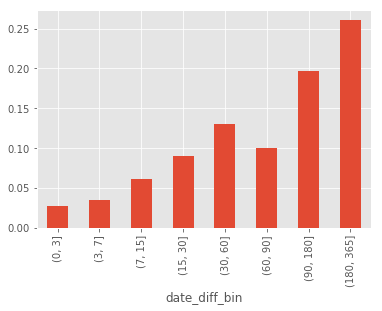

In [47]:
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar()

有2.5%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。数字并不好看，CD购买确实不是高频消费行为。时间范围放宽后数字好看了不少，有20%的用户在第一次消费后的三个月到半年之间有过购买，27%的用户在半年后至1年内有过购买。从运营角度看，CD机营销在教育新用户的同时，应该注重用户忠诚度的培养，放长线掉大鱼，在一定时间内召回用户购买。

In [81]:
grouped =user_purchase_retention.groupby('user_id')
i=0
for user,group in grouped:
    print(group)
    i+= 1
    if i==2:
        break


   user_id  order_products  order_amount order_date order_date_min  \
0        1               1         11.77 1997-01-01     1997-01-01   

  order_date_diff date_diff_bin  date_diff  
0          0 days           NaN        0.0  
   user_id  order_products  order_amount order_date order_date_min  \
1        2               1          12.0 1997-01-12     1997-01-12   
2        2               5          77.0 1997-01-12     1997-01-12   

  order_date_diff date_diff_bin  date_diff  
1          0 days           NaN        0.0  
2          0 days           NaN        0.0  


我们将用户分组，groupby分组后的数据，也是能用for进行循环和迭代的。第一个循环对象user，是分组的对象，即user_id；第二个循环对象group，是分组聚合后的结果。为了举例我用了print，它依次输出了user_id=1,user_id=2时的用户消费数据，是一组切割后的DataFrame。

In [82]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d

last_diff =user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10)

user_id   
1        0      NaN
2        1      0.0
         2      NaN
3        3    -87.0
         4     -3.0
         5   -227.0
         6    -10.0
         7   -184.0
         8      NaN
4        9    -17.0
Name: date_diff, dtype: float64

In [73]:
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff_bin,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,NaN,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,NaN,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,NaN,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,NaN,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,"(60, 90]",87.0


In [83]:
last_diff.mean()

-68.97376814424265

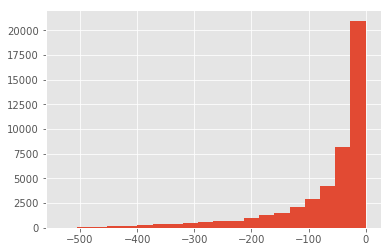

In [84]:
last_diff.hist(bins=20)